In [ ]:
import torch
from torch import nn   # nn contains all pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [ ]:
# creating data set
start = 0
end = 1
step = 0.02
weight = 0.7
bias = 0.3
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight*X + bias
print(X[:10])
print(y[:10])
print(len(X))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50


In [ ]:
# test and train split
split_value = int(0.8*(len(X)))
print(split_value)
X_train, y_train = X[:split_value], y[:split_value]
X_test, y_test = X[split_value:], y[split_value:]
len(X_train), len(y_train), len(X_test), len(y_test)

40


(40, 40, 10, 10)

In [ ]:
a = 0.8*len(X)
type(a)

float

In [ ]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):

  plt.figure(figsize=(8,6))

  #plot training data in blue
  plt.scatter(train_data, train_label, c = "b", s=4, label="Training data")

  #plot test data in green
  plt.scatter(test_data, test_label, c = "g", s=4, label ="Test data")

  #plot predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c ="r", s=4, label ="Predictions")

  plt.legend(prop={"size": 17});


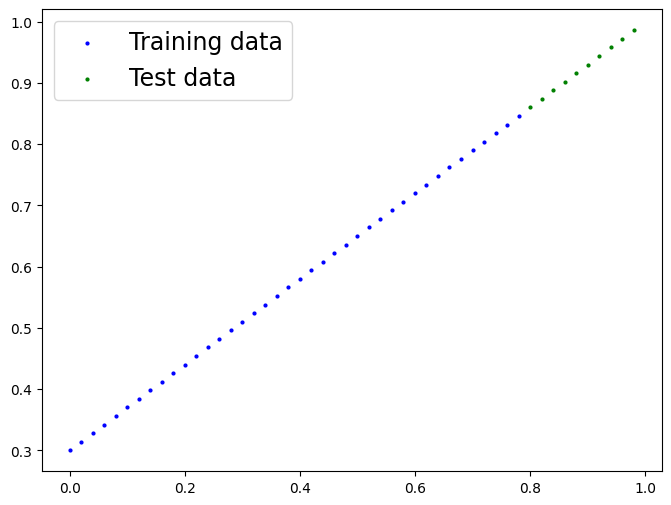

In [ ]:
plot_predictions();

#Building Models
not implemented error - due to indentation errors in functions


In [ ]:
# building a model for linear regression
class linearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                              dtype = torch.float), #torch.float32 by default
                              requires_grad= True) #can we update this value with gradient descent
    self.bias = nn.Parameter(torch.randn(1,
                            dtype = torch.float),
                            requires_grad= True)

  def forward(self, x: torch.tensor) -> torch.tensor :
    return self.weight * x + self.bias

#any subclass of nn.module needs a forward method(this defines forward computatuion of a model)

In [ ]:
torch.manual_seed(42)
model_0 = linearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([0.3367], requires_grad=True)

In [ ]:
for param in model_0.parameters():
    # param is a tensor representing a model parameter
    print(param)


Parameter containing:
tensor([0.3367], requires_grad=True)
Parameter containing:
tensor([0.1288], requires_grad=True)


In [ ]:
model_0.state_dict()  #another way of seeing parameters as dictionary

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_pred = model_0(X_test)

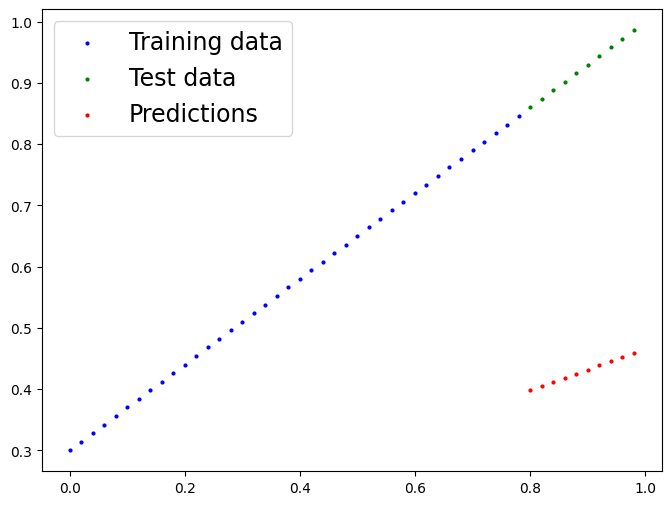

In [ ]:
plot_predictions(predictions = y_pred)

#Training the model


In [ ]:
#creating the loss function
loss_fn = nn.L1Loss() #MAE loss

# choosing optimiser
optimiser = torch.optim.SGD(model_0.parameters(), lr = 0.01)

In [ ]:
#Pass the model through the data for the number of epochs
epoch_count = []
test_loss_values = []
train_loss_values = []
epochs = 200
for epoch in range(epochs):
  #put the model in training mode. This is the default state of model
  model_0.train()

  #1.forward pass on the training data using forward() method. Basically caculating y_predicted values
  y_pred = model_0(X_train)

  #2.Calculate the loss of y_predicted w.r.t to the y_true values
  loss = loss_fn(y_pred,y_train)

  #3.zero the gradients of the optimiser(since after each epoch they accumulate)
  optimiser.zero_grad()

  #4.perform backpropagation (computes the gradient of every parameter (with requires_grad = true) )
  loss.backward()

  #5.Step the optimiser with respect to the gradients calculated in loss.backward
  # (updates the parameters with the help of gradients and lr)
  optimiser.step()

  model_0.eval() #turns off different settings in the model not required for evaluation/testing (dropout/Batch norm layers)
  with torch.inference_mode(): #turns off  gradient tracking and couple of things behind the scene
  #with torch.no_grad(): used in older pytorch codes
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
  if epoch%10 == 0 :
    print(f"epoch = {epoch} | train loss: {loss} | test loss: {test_loss}")
    print(model_0.state_dict())




epoch = 0 | train loss: 0.31288138031959534 | test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch = 10 | train loss: 0.1976713240146637 | test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch = 20 | train loss: 0.08908725529909134 | test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch = 30 | train loss: 0.053148526698350906 | test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch = 40 | train loss: 0.04543796554207802 | test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch = 50 | train loss: 0.04167863354086876 | test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch = 60 | train loss: 0.03818932920694351 | test loss: 0.08886633068323135
OrderedDict([('weight', 

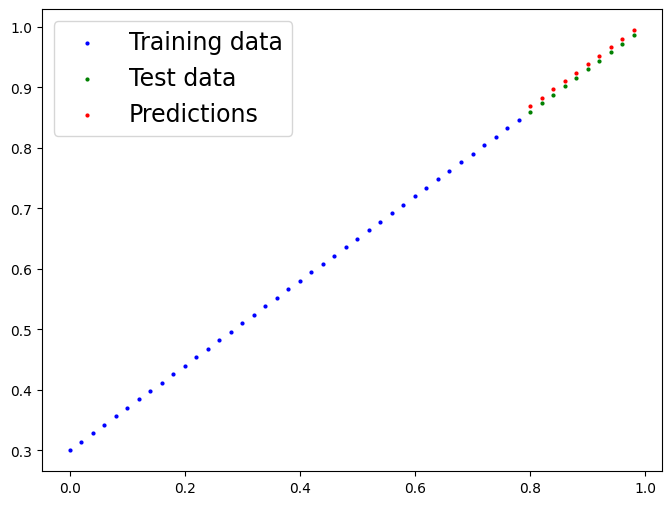

In [ ]:
plot_predictions(predictions = test_pred)

In [ ]:
import numpy as np
(torch.tensor(train_loss_values).numpy())

array([0.31288138, 0.30136034, 0.28983936, 0.27831835, 0.26679736,
       0.25527635, 0.24375534, 0.23223433, 0.22071333, 0.20919232,
       0.19767132, 0.18615034, 0.17462933, 0.16310832, 0.15158734,
       0.14006636, 0.12854536, 0.11702438, 0.10609122, 0.09681284,
       0.08908726, 0.08227583, 0.07638873, 0.07160007, 0.06747635,
       0.06395438, 0.06097005, 0.05845819, 0.05635259, 0.05458578,
       0.05314853, 0.05181945, 0.05069301, 0.04982285, 0.04895269,
       0.04819351, 0.04753182, 0.04692793, 0.04642332, 0.04591871,
       0.04543797, 0.04503796, 0.04463796, 0.04423796, 0.04383796,
       0.04343796, 0.04307463, 0.04272563, 0.04237663, 0.04202763,
       0.04167863, 0.04132963, 0.04098063, 0.04063163, 0.04028264,
       0.03993364, 0.03958464, 0.03923564, 0.03888664, 0.03853764,
       0.03818933, 0.03785244, 0.03750344, 0.03716412, 0.03681822,
       0.03647511, 0.03613304, 0.0357861 , 0.03544784, 0.03509884,
       0.0347609 , 0.03441364, 0.03407188, 0.03372844, 0.03338

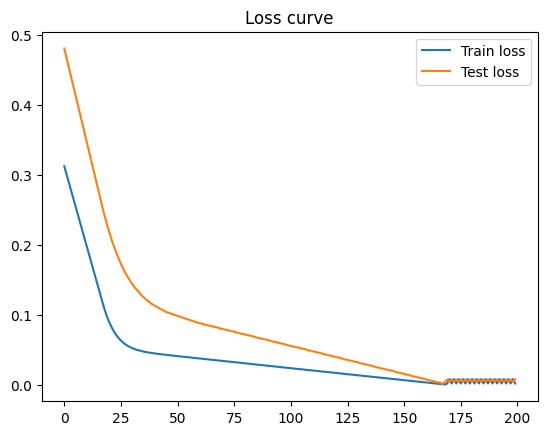

In [ ]:
train_loss_values = torch.tensor(train_loss_values).numpy()
test_loss_values = torch.tensor(test_loss_values).numpy()

plt.plot( epoch_count,train_loss_values, label= "Train loss")
plt.plot( epoch_count,test_loss_values, label= "Test loss")
plt.title("Loss curve")
plt.legend() ;

#Saving a model in pytorch
1. torch.save() : Allows you to save a Pytorch object in Python's pickle format
2. torch.load() : Allows you load a saved pytorch object
3. torch.nn.Module.load_state_dict()- This allows to load a model's saved state dictionary

In [ ]:
!pip install pathlib

In [ ]:
#Saving our PyTorch model
from pathlib import Path

#1. Creating model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
#3. Save the model state dict
torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1107 Oct 12 09:07 01_pytorch_model_0.pth


In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = linearRegressionModel()
#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_pred = model_0(X_test)
y_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], grad_fn=<AddBackward0>)

In [ ]:
y_pred == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #using nn.layers to create parameters
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self,x: torch.tensor) -> torch.tensor :
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])